<a href="https://colab.research.google.com/github/rahulchalla-60/major_project/blob/main/Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()


Saving merged.xlsx to merged (1).xlsx


In [9]:
file_path = "/content/drive/MyDrive/merged.xlsx"

In [10]:
import pandas as pd

# If uploaded directly
# df = pd.read_excel("your_excel_file.xlsx")

# If from Drive
# df = pd.read_excel(file_path)

# If uploaded directly to Colab
df = pd.read_excel("/content/merged.xlsx")

print(df.head())

            State   District     Market       Commodity         Variety  \
0  Andhra Pradesh  Anantapur  Tadipatri  Banana - Green  Banana - Green   
1  Andhra Pradesh  Anantapur  Tadipatri  Banana - Green  Banana - Green   
2  Andhra Pradesh  Anantapur  Tadipatri  Banana - Green  Banana - Green   
3  Andhra Pradesh  Anantapur  Tadipatri  Banana - Green  Banana - Green   
4  Andhra Pradesh  Anantapur  Tadipatri  Banana - Green  Banana - Green   

    Grade Arrival_Date  Min_Price  Max_Price  Modal_Price  Commodity_Code  
0  Medium   2017-01-01        600        700          650              90  
1  Medium   2017-01-27       1400       1600         1500              90  
2  Medium   2017-03-03       1400       1600         1500              90  
3  Medium   2017-03-09       1600       1800         1700              90  
4  Medium   2017-03-12       1300       1500         1400              90  


In [11]:
# Check for missing values
print(df.isnull().sum())

State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64


In [12]:
df = df.drop_duplicates()

In [13]:
df = df.fillna("Unknown")

In [14]:
df = df.drop_duplicates()

In [15]:
# Convert Arrival_Date to datetime & extract features
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], errors='coerce')
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month
df['Day'] = df['Arrival_Date'].dt.day
df['DayOfWeek'] = df['Arrival_Date'].dt.dayofweek

In [16]:
# Create Avg_Price
df['Avg_Price'] = (df['Min_Price'] + df['Max_Price']) / 2

In [17]:
display(df.head())

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Year,Month,Day,DayOfWeek,Avg_Price
0,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-01-01,600,700,650,90,2017,1,1,6,650.0
1,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-01-27,1400,1600,1500,90,2017,1,27,4,1500.0
2,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-03-03,1400,1600,1500,90,2017,3,3,4,1500.0
3,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-03-09,1600,1800,1700,90,2017,3,9,3,1700.0
4,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-03-12,1300,1500,1400,90,2017,3,12,6,1400.0


In [18]:
# 6. Select categorical columns for encoding
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']

# Convert categorical columns to string type
for col in categorical_cols:
    df[col] = df[col].astype(str)

# 7. One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore")
encoded = encoder.fit_transform(df[categorical_cols])

In [19]:
print(encoded.shape)

(10340, 38)


In [20]:
display(df.head())

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Year,Month,Day,DayOfWeek,Avg_Price
0,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-01-01,600,700,650,90,2017,1,1,6,650.0
1,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-01-27,1400,1600,1500,90,2017,1,27,4,1500.0
2,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-03-03,1400,1600,1500,90,2017,3,3,4,1500.0
3,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-03-09,1600,1800,1700,90,2017,3,9,3,1700.0
4,Andhra Pradesh,Anantapur,Tadipatri,Banana - Green,Banana - Green,Medium,2017-03-12,1300,1500,1400,90,2017,3,12,6,1400.0


In [21]:
import numpy as np

# Drop original categorical columns and Arrival_Date
df_numerical = df.drop(columns=categorical_cols + ['Arrival_Date'])

# Convert the sparse matrix to a dense array before concatenation
encoded_dense = encoded.toarray()

# Combine numerical and encoded features
X = np.concatenate([df_numerical.values, encoded_dense], axis=1)

print("Shape of the combined feature set:", X.shape)

Shape of the combined feature set: (10340, 47)


In [22]:
# Convert the sparse matrix to a dense array and display the first 5 rows
print(encoded.toarray()[:5])

[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [23]:
# Display the categories learned by the encoder for each column
print("Categories for each original categorical column:")
for i, categories in enumerate(encoder.categories_):
    print(f"Column '{categorical_cols[i]}': {categories}")

Categories for each original categorical column:
Column 'State': ['Andhra Pradesh']
Column 'District': ['Anantapur']
Column 'Market': ['Dharmavaram' 'Gooti' 'Guntakal' 'Hindupur' 'Kalyandurg' 'Madakasira'
 'Penukonda' 'Rayadurg' 'Tadipatri' 'Urvakonda']
Column 'Commodity': ['Banana - Green' 'Paddy(Dhan)(Common)']
Column 'Variety': ['1001' 'A. Ponni' 'AST 17' 'AST 20' 'Annapoorna' 'B P T' 'B. T.'
 'B.A.M. 3' 'Banana - Green' 'Hansa' 'I.R. 49' 'I.R. 64' 'I.R.-64'
 'Manila' 'Masuri' 'Other' 'Paddy' 'Samba Masuri' 'Sona' 'Sona Mahsuri']
Column 'Grade': ['FAQ' 'Large' 'Medium' 'Small']


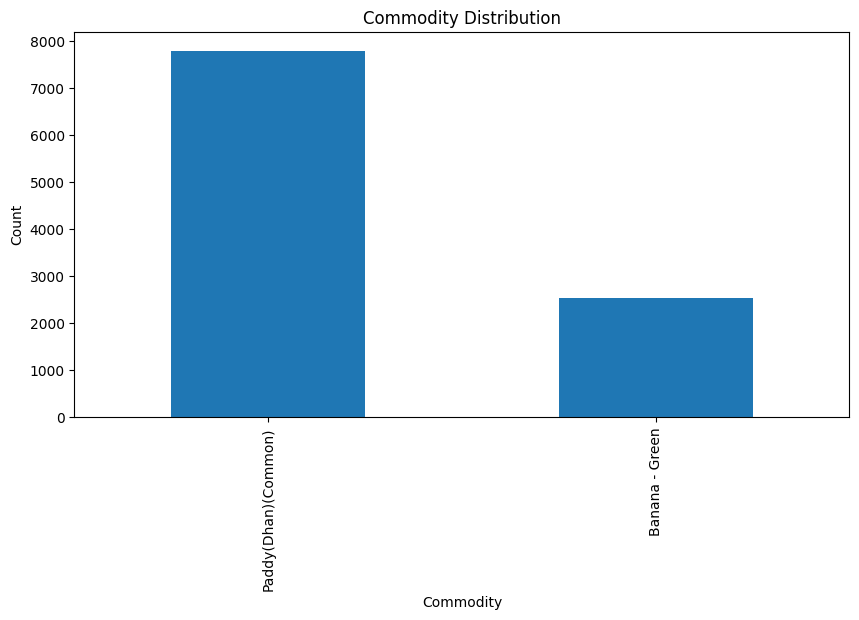

In [24]:
import matplotlib.pyplot as plt

df['Commodity'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Commodity Distribution")
plt.xlabel("Commodity")
plt.ylabel("Count")
plt.show()


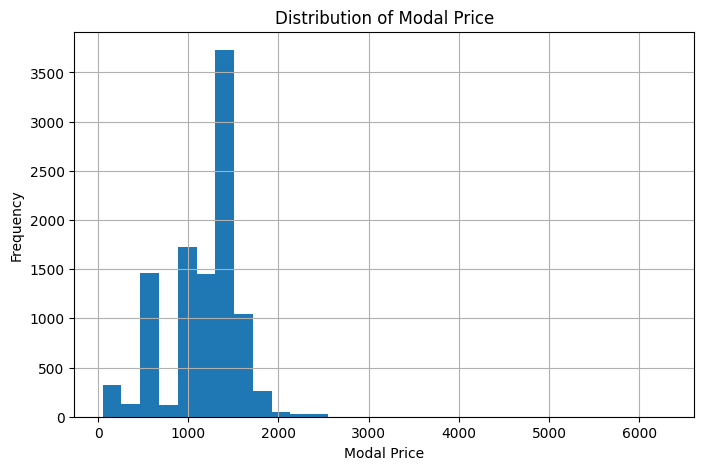

In [25]:
df['Modal_Price'].hist(bins=30, figsize=(8,5))
plt.title("Distribution of Modal Price")
plt.xlabel("Modal Price")
plt.ylabel("Frequency")
plt.show()


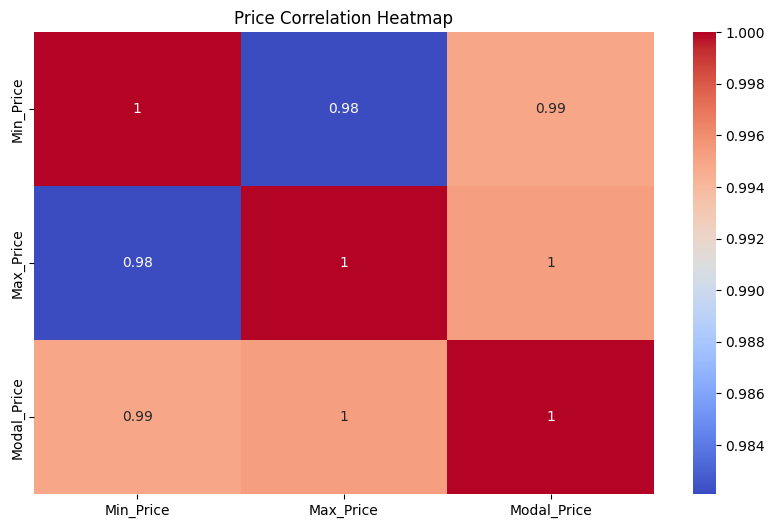

In [26]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[['Min_Price','Max_Price','Modal_Price']].corr(), annot=True, cmap="coolwarm")
plt.title("Price Correlation Heatmap")
plt.show()


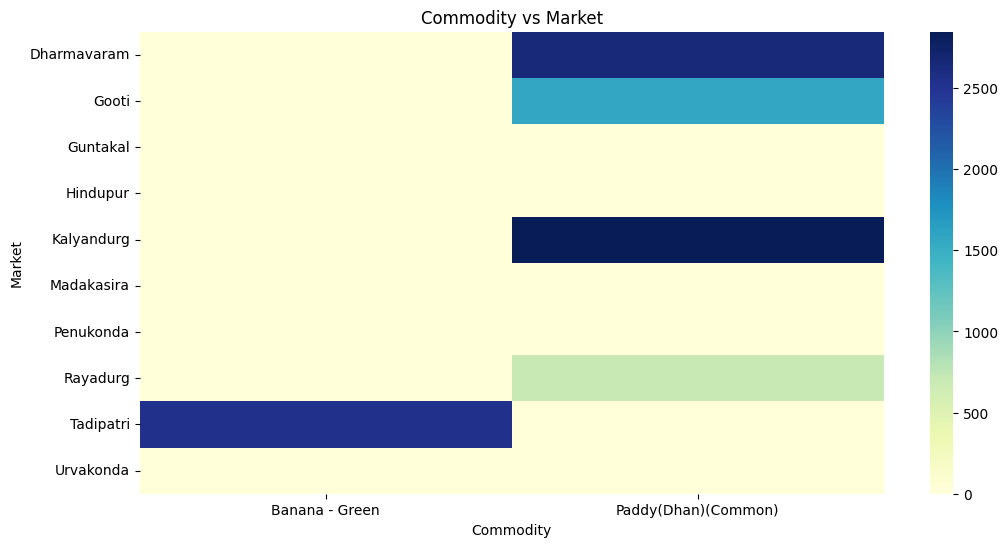

In [27]:
crosstab = pd.crosstab(df['Market'], df['Commodity'])
plt.figure(figsize=(12,6))
sns.heatmap(crosstab, cmap="YlGnBu")
plt.title("Commodity vs Market")
plt.show()


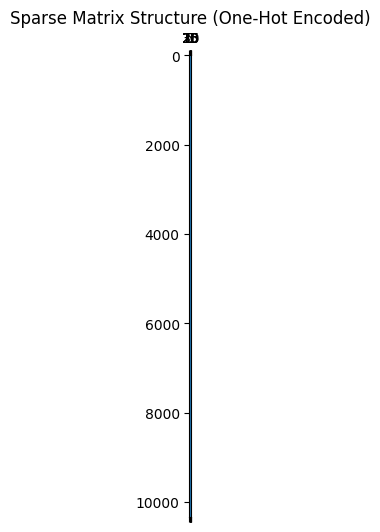

In [28]:
plt.figure(figsize=(12,6))
plt.spy(encoded, markersize=1)
plt.title("Sparse Matrix Structure (One-Hot Encoded)")
plt.show()


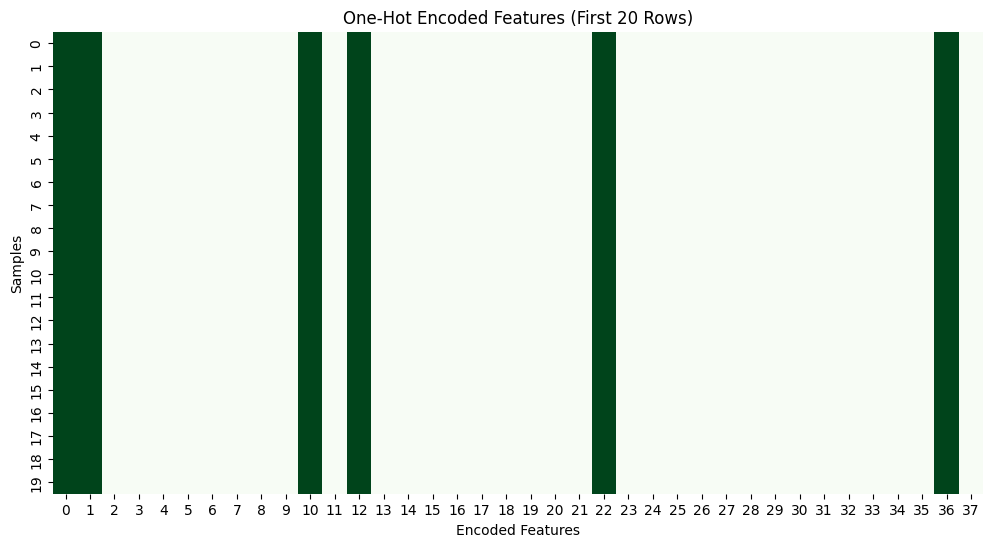

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(encoded.toarray()[:20], cmap="Greens", cbar=False)
plt.title("One-Hot Encoded Features (First 20 Rows)")
plt.xlabel("Encoded Features")
plt.ylabel("Samples")
plt.show()


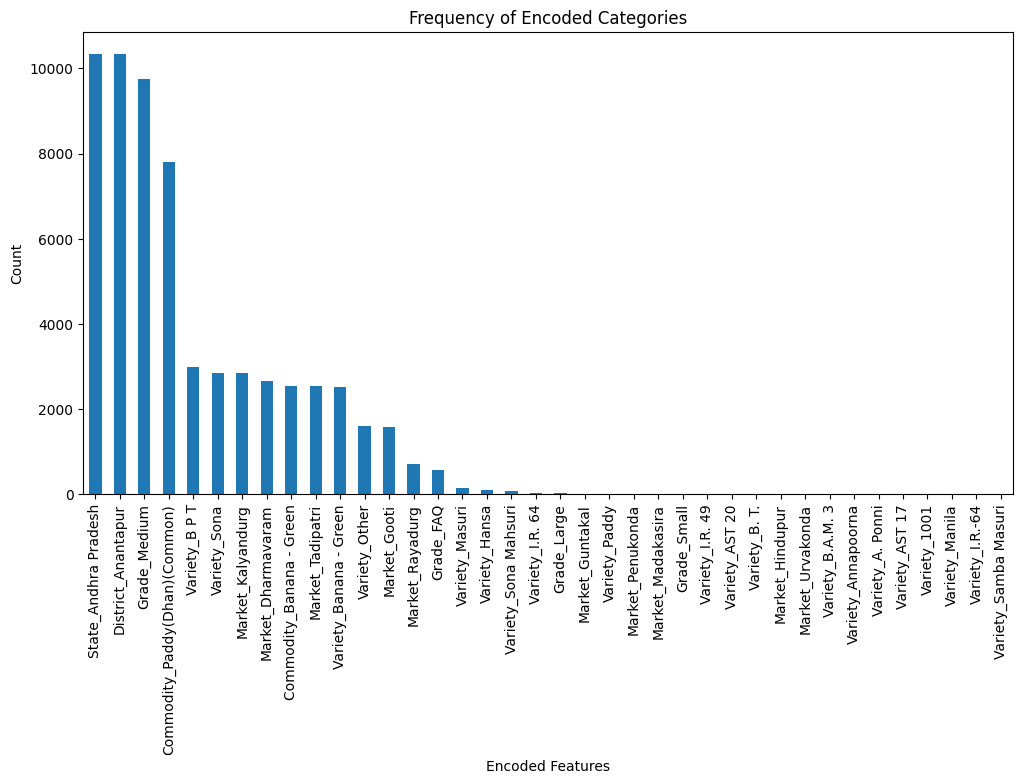

In [30]:
encoded_df = pd.DataFrame(
    encoded.toarray(),
    columns=encoder.get_feature_names_out(categorical_cols)
)

category_counts = encoded_df.sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
category_counts.plot(kind="bar")
plt.title("Frequency of Encoded Categories")
plt.xlabel("Encoded Features")
plt.ylabel("Count")
plt.show()


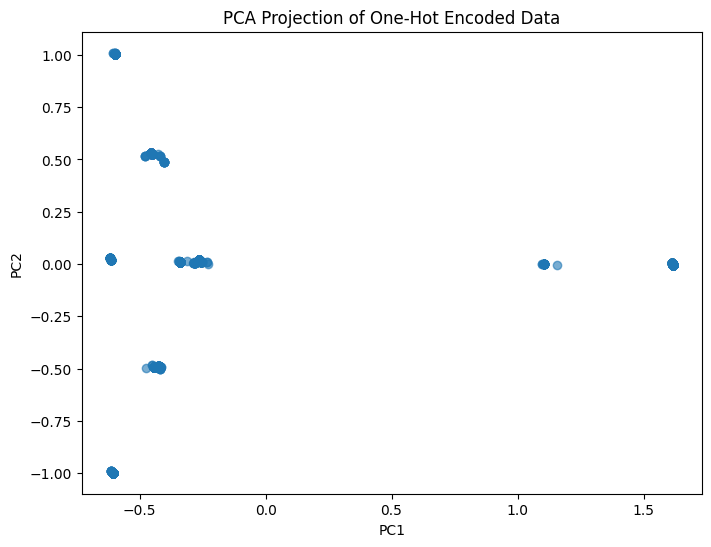

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(encoded.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], alpha=0.6)
plt.title("PCA Projection of One-Hot Encoded Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [54]:
banana_df = df[df["Commodity"] == "Banana - Green"].copy()
paddy_df  = df[df["Commodity"] == "Paddy(Dhan)(Common)"].copy()


In [60]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sort by date
banana_df = banana_df.sort_values("Arrival_Date")

# Shift target 180 days ahead
banana_df["Target"] = banana_df["Avg_Price"].shift(-180)
banana_df = banana_df.dropna()

# Scale prices
scaler_banana = MinMaxScaler()
banana_df["Scaled_Price"] = scaler_banana.fit_transform(banana_df[["Avg_Price"]])
banana_df["Scaled_Target"] = scaler_banana.fit_transform(banana_df[["Target"]])

# Create sequences
timesteps = 60
X_banana, y_banana = [], []
for i in range(len(banana_df) - timesteps):
    X_banana.append(banana_df["Scaled_Price"].values[i:i+timesteps])
    y_banana.append(banana_df["Scaled_Target"].values[i+timesteps])

X_banana, y_banana = np.array(X_banana), np.array(y_banana)
X_banana = X_banana.reshape((X_banana.shape[0], X_banana.shape[1], 1))


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_banana = Sequential()
model_banana.add(LSTM(50, return_sequences=True, input_shape=(timesteps, 1)))
model_banana.add(Dropout(0.2))
model_banana.add(LSTM(50))
model_banana.add(Dropout(0.2))
model_banana.add(Dense(1))

model_banana.compile(optimizer="adam", loss="mse")

history_banana = model_banana.fit(
    X_banana, y_banana,
    epochs=50, batch_size=32,
    validation_split=0.2,
    shuffle=False,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0588 - val_loss: 0.1050
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0364 - val_loss: 0.1109
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0377 - val_loss: 0.1119
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0390 - val_loss: 0.1095
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0381 - val_loss: 0.1121
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0374 - val_loss: 0.1127
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0382 - val_loss: 0.1118
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0371 - val_loss: 0.1148
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0373 - val_loss: 0.1129
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0368 - val_loss: 0.1147
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0374 - val_loss: 0.1142
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0363 - val_loss: 0

In [61]:
last_sequence_banana = banana_df["Scaled_Price"].values[-timesteps:]
last_sequence_banana = last_sequence_banana.reshape((1, timesteps, 1))

pred_scaled_banana = model_banana.predict(last_sequence_banana)
pred_banana_price = scaler_banana.inverse_transform(pred_scaled_banana)

print("Predicted Banana Price after 6 months:", pred_banana_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Banana Price after 6 months: 473.02026


In [62]:
# Sort by date
paddy_df = paddy_df.sort_values("Arrival_Date")

# Shift target 180 days ahead
paddy_df["Target"] = paddy_df["Avg_Price"].shift(-180)
paddy_df = paddy_df.dropna()

# Scale
scaler_paddy = MinMaxScaler()
paddy_df["Scaled_Price"] = scaler_paddy.fit_transform(paddy_df[["Avg_Price"]])
paddy_df["Scaled_Target"] = scaler_paddy.fit_transform(paddy_df[["Target"]])

# Create sequences
X_paddy, y_paddy = [], []
for i in range(len(paddy_df) - timesteps):
    X_paddy.append(paddy_df["Scaled_Price"].values[i:i+timesteps])
    y_paddy.append(paddy_df["Scaled_Target"].values[i+timesteps])

X_paddy, y_paddy = np.array(X_paddy), np.array(y_paddy)
X_paddy = X_paddy.reshape((X_paddy.shape[0], X_paddy.shape[1], 1))

# Build model
model_paddy = Sequential()
model_paddy.add(LSTM(50, return_sequences=True, input_shape=(timesteps, 1)))
model_paddy.add(Dropout(0.2))
model_paddy.add(LSTM(50))
model_paddy.add(Dropout(0.2))
model_paddy.add(Dense(1))

model_paddy.compile(optimizer="adam", loss="mse")

history_paddy = model_paddy.fit(
    X_paddy, y_paddy,
    epochs=50, batch_size=32,
    validation_split=0.2,
    shuffle=False,
    verbose=1
)




Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.8000e-04 - val_loss: 0.0035
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 10/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 11/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 12/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - 

In [63]:
# Predict
last_sequence_paddy = paddy_df["Scaled_Price"].values[-timesteps:]
last_sequence_paddy = last_sequence_paddy.reshape((1, timesteps, 1))

pred_scaled_paddy = model_paddy.predict(last_sequence_paddy)
pred_paddy_price = scaler_paddy.inverse_transform(pred_scaled_paddy)

print("Predicted Paddy Price after 6 months:", pred_paddy_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Paddy Price after 6 months: 1471.239
